In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.transform import resize
from skimage.filters import threshold_otsu
from sklearn.model_selection import train_test_split

from keras import backend as K
from keras.models import Model, load_model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.layers.normalization import BatchNormalization
from keras.layers import BatchNormalization
from keras.preprocessing.image import img_to_array
from keras.layers.advanced_activations import LeakyReLU, PReLU

np.random.seed(1729)

In [19]:
melanoma_path = 'melanoma/'
others_path = 'others/'
gt_path = 'gt/'

In [20]:
images_melanoma = os.listdir(melanoma_path)
images_others = os.listdir(others_path)
images = images_melanoma + images_others
images = sorted(images)
img_masks = os.listdir(gt_path)
img_masks = sorted(img_masks)
print(len(images), len(img_masks))

2000 2000


In [21]:
img_rows = 256
img_cols = 256

In [70]:
total = len(images_melanoma) + len(images_others)
imgs = np.ndarray((total, img_rows, img_cols, 1), dtype = np.float)
imgs_mask = np.ndarray((total, img_rows, img_cols, 1), dtype = np.float)

i = 0
for image_name in images_melanoma :
    image = imread(melanoma_path + image_name, as_grey=True)  
    image = resize(image, (img_rows, img_cols, 1))
    image = img_to_array(image)
    imgs[i] = image
    image_mask_name = image_name[:-4] + '_segmentation.png'
    image_mask = imread(gt_path + image_mask_name)
    image_mask = resize(image_mask, (img_rows, img_cols, 1))
    thresh = threshold_otsu(image_mask)
    image_mask = image_mask > thresh
    image_mask = img_to_array(image_mask)
    imgs_mask[i] = image_mask
    print(i, ' ', image_name, ' ', image_mask_name)
    i = i + 1
    
print("----")

for image_name in images_others :
    image = imread(others_path + image_name, as_grey=True)  
    image = resize(image, (img_rows, img_cols, 1))
    image = img_to_array(image)
    imgs[i] = image
    image_mask_name = image_name[:-4] + '_segmentation.png'
    image_mask = imread(gt_path + image_mask_name)
    image_mask = resize(image_mask, (img_rows, img_cols, 1))
    thresh = threshold_otsu(image_mask)
    image_mask = img_to_array(image_mask)
    imgs_mask[i] = image_mask
    print(i, ' ', image_name, ' ', image_mask_name)
    i = i + 1
    
print("----")

c:\users\ananda\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


0   ISIC_0000002.jpg   ISIC_0000002_segmentation.png
1   ISIC_0000004.jpg   ISIC_0000004_segmentation.png
2   ISIC_0000013.jpg   ISIC_0000013_segmentation.png
3   ISIC_0000022.jpg   ISIC_0000022_segmentation.png
4   ISIC_0000026.jpg   ISIC_0000026_segmentation.png
5   ISIC_0000029.jpg   ISIC_0000029_segmentation.png
6   ISIC_0000030.jpg   ISIC_0000030_segmentation.png
7   ISIC_0000031.jpg   ISIC_0000031_segmentation.png
8   ISIC_0000035.jpg   ISIC_0000035_segmentation.png
9   ISIC_0000036.jpg   ISIC_0000036_segmentation.png
10   ISIC_0000040.jpg   ISIC_0000040_segmentation.png
11   ISIC_0000043.jpg   ISIC_0000043_segmentation.png
12   ISIC_0000046.jpg   ISIC_0000046_segmentation.png
13   ISIC_0000049.jpg   ISIC_0000049_segmentation.png
14   ISIC_0000054.jpg   ISIC_0000054_segmentation.png
15   ISIC_0000056.jpg   ISIC_0000056_segmentation.png
16   ISIC_0000074.jpg   ISIC_0000074_segmentation.png
17   ISIC_0000077.jpg   ISIC_0000077_segmentation.png
18   ISIC_0000078.jpg   ISIC_0000078_s

152   ISIC_0010089.jpg   ISIC_0010089_segmentation.png
153   ISIC_0010094.jpg   ISIC_0010094_segmentation.png
154   ISIC_0010171.jpg   ISIC_0010171_segmentation.png
155   ISIC_0010174.jpg   ISIC_0010174_segmentation.png
156   ISIC_0010194.jpg   ISIC_0010194_segmentation.png
157   ISIC_0010207.jpg   ISIC_0010207_segmentation.png
158   ISIC_0010225.jpg   ISIC_0010225_segmentation.png
159   ISIC_0010231.jpg   ISIC_0010231_segmentation.png
160   ISIC_0010240.jpg   ISIC_0010240_segmentation.png
161   ISIC_0010241.jpg   ISIC_0010241_segmentation.png
162   ISIC_0010251.jpg   ISIC_0010251_segmentation.png
163   ISIC_0010265.jpg   ISIC_0010265_segmentation.png
164   ISIC_0010267.jpg   ISIC_0010267_segmentation.png
165   ISIC_0010329.jpg   ISIC_0010329_segmentation.png
166   ISIC_0010350.jpg   ISIC_0010350_segmentation.png
167   ISIC_0010358.jpg   ISIC_0010358_segmentation.png
168   ISIC_0010360.jpg   ISIC_0010360_segmentation.png
169   ISIC_0010364.jpg   ISIC_0010364_segmentation.png
170   ISIC

301   ISIC_0014136.jpg   ISIC_0014136_segmentation.png
302   ISIC_0014144.jpg   ISIC_0014144_segmentation.png
303   ISIC_0014151.jpg   ISIC_0014151_segmentation.png
304   ISIC_0014156.jpg   ISIC_0014156_segmentation.png
305   ISIC_0014157.jpg   ISIC_0014157_segmentation.png
306   ISIC_0014163.jpg   ISIC_0014163_segmentation.png
307   ISIC_0014171.jpg   ISIC_0014171_segmentation.png
308   ISIC_0014173.jpg   ISIC_0014173_segmentation.png
309   ISIC_0014183.jpg   ISIC_0014183_segmentation.png
310   ISIC_0014187.jpg   ISIC_0014187_segmentation.png
311   ISIC_0014189.jpg   ISIC_0014189_segmentation.png
312   ISIC_0014190.jpg   ISIC_0014190_segmentation.png
313   ISIC_0014222.jpg   ISIC_0014222_segmentation.png
314   ISIC_0014229.jpg   ISIC_0014229_segmentation.png
315   ISIC_0014238.jpg   ISIC_0014238_segmentation.png
316   ISIC_0014249.jpg   ISIC_0014249_segmentation.png
317   ISIC_0014289.jpg   ISIC_0014289_segmentation.png
318   ISIC_0014290.jpg   ISIC_0014290_segmentation.png
319   ISIC

450   ISIC_0000104.jpg   ISIC_0000104_segmentation.png
451   ISIC_0000105.jpg   ISIC_0000105_segmentation.png
452   ISIC_0000107.jpg   ISIC_0000107_segmentation.png
453   ISIC_0000108.jpg   ISIC_0000108_segmentation.png
454   ISIC_0000109.jpg   ISIC_0000109_segmentation.png
455   ISIC_0000110.jpg   ISIC_0000110_segmentation.png
456   ISIC_0000111.jpg   ISIC_0000111_segmentation.png
457   ISIC_0000112.jpg   ISIC_0000112_segmentation.png
458   ISIC_0000113.jpg   ISIC_0000113_segmentation.png
459   ISIC_0000116.jpg   ISIC_0000116_segmentation.png
460   ISIC_0000118.jpg   ISIC_0000118_segmentation.png
461   ISIC_0000119.jpg   ISIC_0000119_segmentation.png
462   ISIC_0000120.jpg   ISIC_0000120_segmentation.png
463   ISIC_0000121.jpg   ISIC_0000121_segmentation.png
464   ISIC_0000122.jpg   ISIC_0000122_segmentation.png
465   ISIC_0000123.jpg   ISIC_0000123_segmentation.png
466   ISIC_0000124.jpg   ISIC_0000124_segmentation.png
467   ISIC_0000125.jpg   ISIC_0000125_segmentation.png
468   ISIC

600   ISIC_0000364.jpg   ISIC_0000364_segmentation.png
601   ISIC_0000365.jpg   ISIC_0000365_segmentation.png
602   ISIC_0000366.jpg   ISIC_0000366_segmentation.png
603   ISIC_0000367.jpg   ISIC_0000367_segmentation.png
604   ISIC_0000368.jpg   ISIC_0000368_segmentation.png
605   ISIC_0000369.jpg   ISIC_0000369_segmentation.png
606   ISIC_0000370.jpg   ISIC_0000370_segmentation.png
607   ISIC_0000371.jpg   ISIC_0000371_segmentation.png
608   ISIC_0000372.jpg   ISIC_0000372_segmentation.png
609   ISIC_0000374.jpg   ISIC_0000374_segmentation.png
610   ISIC_0000376.jpg   ISIC_0000376_segmentation.png
611   ISIC_0000377.jpg   ISIC_0000377_segmentation.png
612   ISIC_0000378.jpg   ISIC_0000378_segmentation.png
613   ISIC_0000379.jpg   ISIC_0000379_segmentation.png
614   ISIC_0000380.jpg   ISIC_0000380_segmentation.png
615   ISIC_0000381.jpg   ISIC_0000381_segmentation.png
616   ISIC_0000382.jpg   ISIC_0000382_segmentation.png
617   ISIC_0000383.jpg   ISIC_0000383_segmentation.png
618   ISIC

749   ISIC_0003005.jpg   ISIC_0003005_segmentation.png
750   ISIC_0003051.jpg   ISIC_0003051_segmentation.png
751   ISIC_0003056.jpg   ISIC_0003056_segmentation.png
752   ISIC_0003174.jpg   ISIC_0003174_segmentation.png
753   ISIC_0003308.jpg   ISIC_0003308_segmentation.png
754   ISIC_0003346.jpg   ISIC_0003346_segmentation.png
755   ISIC_0003728.jpg   ISIC_0003728_segmentation.png
756   ISIC_0004110.jpg   ISIC_0004110_segmentation.png
757   ISIC_0004115.jpg   ISIC_0004115_segmentation.png
758   ISIC_0004166.jpg   ISIC_0004166_segmentation.png
759   ISIC_0004168.jpg   ISIC_0004168_segmentation.png
760   ISIC_0004309.jpg   ISIC_0004309_segmentation.png
761   ISIC_0004346.jpg   ISIC_0004346_segmentation.png
762   ISIC_0004715.jpg   ISIC_0004715_segmentation.png
763   ISIC_0004985.jpg   ISIC_0004985_segmentation.png
764   ISIC_0005000.jpg   ISIC_0005000_segmentation.png
765   ISIC_0005187.jpg   ISIC_0005187_segmentation.png
766   ISIC_0005548.jpg   ISIC_0005548_segmentation.png
767   ISIC

899   ISIC_0009969.jpg   ISIC_0009969_segmentation.png
900   ISIC_0009972.jpg   ISIC_0009972_segmentation.png
901   ISIC_0009973.jpg   ISIC_0009973_segmentation.png
902   ISIC_0009974.jpg   ISIC_0009974_segmentation.png
903   ISIC_0009975.jpg   ISIC_0009975_segmentation.png
904   ISIC_0009976.jpg   ISIC_0009976_segmentation.png
905   ISIC_0009977.jpg   ISIC_0009977_segmentation.png
906   ISIC_0009979.jpg   ISIC_0009979_segmentation.png
907   ISIC_0009981.jpg   ISIC_0009981_segmentation.png
908   ISIC_0009982.jpg   ISIC_0009982_segmentation.png
909   ISIC_0009987.jpg   ISIC_0009987_segmentation.png
910   ISIC_0009991.jpg   ISIC_0009991_segmentation.png
911   ISIC_0009994.jpg   ISIC_0009994_segmentation.png
912   ISIC_0009998.jpg   ISIC_0009998_segmentation.png
913   ISIC_0010002.jpg   ISIC_0010002_segmentation.png
914   ISIC_0010003.jpg   ISIC_0010003_segmentation.png
915   ISIC_0010005.jpg   ISIC_0010005_segmentation.png
916   ISIC_0010006.jpg   ISIC_0010006_segmentation.png
917   ISIC

1049   ISIC_0010463.jpg   ISIC_0010463_segmentation.png
1050   ISIC_0010465.jpg   ISIC_0010465_segmentation.png
1051   ISIC_0010467.jpg   ISIC_0010467_segmentation.png
1052   ISIC_0010471.jpg   ISIC_0010471_segmentation.png
1053   ISIC_0010472.jpg   ISIC_0010472_segmentation.png
1054   ISIC_0010473.jpg   ISIC_0010473_segmentation.png
1055   ISIC_0010474.jpg   ISIC_0010474_segmentation.png
1056   ISIC_0010475.jpg   ISIC_0010475_segmentation.png
1057   ISIC_0010477.jpg   ISIC_0010477_segmentation.png
1058   ISIC_0010479.jpg   ISIC_0010479_segmentation.png
1059   ISIC_0010480.jpg   ISIC_0010480_segmentation.png
1060   ISIC_0010481.jpg   ISIC_0010481_segmentation.png
1061   ISIC_0010483.jpg   ISIC_0010483_segmentation.png
1062   ISIC_0010487.jpg   ISIC_0010487_segmentation.png
1063   ISIC_0010488.jpg   ISIC_0010488_segmentation.png
1064   ISIC_0010490.jpg   ISIC_0010490_segmentation.png
1065   ISIC_0010492.jpg   ISIC_0010492_segmentation.png
1066   ISIC_0010493.jpg   ISIC_0010493_segmentat

1197   ISIC_0011345.jpg   ISIC_0011345_segmentation.png
1198   ISIC_0011347.jpg   ISIC_0011347_segmentation.png
1199   ISIC_0011352.jpg   ISIC_0011352_segmentation.png
1200   ISIC_0011353.jpg   ISIC_0011353_segmentation.png
1201   ISIC_0011358.jpg   ISIC_0011358_segmentation.png
1202   ISIC_0011359.jpg   ISIC_0011359_segmentation.png
1203   ISIC_0011361.jpg   ISIC_0011361_segmentation.png
1204   ISIC_0011362.jpg   ISIC_0011362_segmentation.png
1205   ISIC_0011363.jpg   ISIC_0011363_segmentation.png
1206   ISIC_0011367.jpg   ISIC_0011367_segmentation.png
1207   ISIC_0011372.jpg   ISIC_0011372_segmentation.png
1208   ISIC_0011382.jpg   ISIC_0011382_segmentation.png
1209   ISIC_0011384.jpg   ISIC_0011384_segmentation.png
1210   ISIC_0011386.jpg   ISIC_0011386_segmentation.png
1211   ISIC_0011393.jpg   ISIC_0011393_segmentation.png
1212   ISIC_0011397.jpg   ISIC_0011397_segmentation.png
1213   ISIC_0011398.jpg   ISIC_0011398_segmentation.png
1214   ISIC_0011402.jpg   ISIC_0011402_segmentat

1344   ISIC_0012526.jpg   ISIC_0012526_segmentation.png
1345   ISIC_0012527.jpg   ISIC_0012527_segmentation.png
1346   ISIC_0012529.jpg   ISIC_0012529_segmentation.png
1347   ISIC_0012539.jpg   ISIC_0012539_segmentation.png
1348   ISIC_0012543.jpg   ISIC_0012543_segmentation.png
1349   ISIC_0012544.jpg   ISIC_0012544_segmentation.png
1350   ISIC_0012549.jpg   ISIC_0012549_segmentation.png
1351   ISIC_0012550.jpg   ISIC_0012550_segmentation.png
1352   ISIC_0012653.jpg   ISIC_0012653_segmentation.png
1353   ISIC_0012655.jpg   ISIC_0012655_segmentation.png
1354   ISIC_0012657.jpg   ISIC_0012657_segmentation.png
1355   ISIC_0012658.jpg   ISIC_0012658_segmentation.png
1356   ISIC_0012659.jpg   ISIC_0012659_segmentation.png
1357   ISIC_0012661.jpg   ISIC_0012661_segmentation.png
1358   ISIC_0012662.jpg   ISIC_0012662_segmentation.png
1359   ISIC_0012663.jpg   ISIC_0012663_segmentation.png
1360   ISIC_0012664.jpg   ISIC_0012664_segmentation.png
1361   ISIC_0012665.jpg   ISIC_0012665_segmentat

1491   ISIC_0013039.jpg   ISIC_0013039_segmentation.png
1492   ISIC_0013040.jpg   ISIC_0013040_segmentation.png
1493   ISIC_0013044.jpg   ISIC_0013044_segmentation.png
1494   ISIC_0013047.jpg   ISIC_0013047_segmentation.png
1495   ISIC_0013048.jpg   ISIC_0013048_segmentation.png
1496   ISIC_0013052.jpg   ISIC_0013052_segmentation.png
1497   ISIC_0013053.jpg   ISIC_0013053_segmentation.png
1498   ISIC_0013054.jpg   ISIC_0013054_segmentation.png
1499   ISIC_0013055.jpg   ISIC_0013055_segmentation.png
1500   ISIC_0013056.jpg   ISIC_0013056_segmentation.png
1501   ISIC_0013059.jpg   ISIC_0013059_segmentation.png
1502   ISIC_0013063.jpg   ISIC_0013063_segmentation.png
1503   ISIC_0013065.jpg   ISIC_0013065_segmentation.png
1504   ISIC_0013071.jpg   ISIC_0013071_segmentation.png
1505   ISIC_0013075.jpg   ISIC_0013075_segmentation.png
1506   ISIC_0013080.jpg   ISIC_0013080_segmentation.png
1507   ISIC_0013084.jpg   ISIC_0013084_segmentation.png
1508   ISIC_0013086.jpg   ISIC_0013086_segmentat

1638   ISIC_0013487.jpg   ISIC_0013487_segmentation.png
1639   ISIC_0013488.jpg   ISIC_0013488_segmentation.png
1640   ISIC_0013489.jpg   ISIC_0013489_segmentation.png
1641   ISIC_0013492.jpg   ISIC_0013492_segmentation.png
1642   ISIC_0013493.jpg   ISIC_0013493_segmentation.png
1643   ISIC_0013494.jpg   ISIC_0013494_segmentation.png
1644   ISIC_0013495.jpg   ISIC_0013495_segmentation.png
1645   ISIC_0013498.jpg   ISIC_0013498_segmentation.png
1646   ISIC_0013516.jpg   ISIC_0013516_segmentation.png
1647   ISIC_0013517.jpg   ISIC_0013517_segmentation.png
1648   ISIC_0013523.jpg   ISIC_0013523_segmentation.png
1649   ISIC_0013526.jpg   ISIC_0013526_segmentation.png
1650   ISIC_0013552.jpg   ISIC_0013552_segmentation.png
1651   ISIC_0013553.jpg   ISIC_0013553_segmentation.png
1652   ISIC_0013554.jpg   ISIC_0013554_segmentation.png
1653   ISIC_0013558.jpg   ISIC_0013558_segmentation.png
1654   ISIC_0013559.jpg   ISIC_0013559_segmentation.png
1655   ISIC_0013568.jpg   ISIC_0013568_segmentat

1785   ISIC_0014164.jpg   ISIC_0014164_segmentation.png
1786   ISIC_0014166.jpg   ISIC_0014166_segmentation.png
1787   ISIC_0014169.jpg   ISIC_0014169_segmentation.png
1788   ISIC_0014174.jpg   ISIC_0014174_segmentation.png
1789   ISIC_0014179.jpg   ISIC_0014179_segmentation.png
1790   ISIC_0014185.jpg   ISIC_0014185_segmentation.png
1791   ISIC_0014191.jpg   ISIC_0014191_segmentation.png
1792   ISIC_0014195.jpg   ISIC_0014195_segmentation.png
1793   ISIC_0014197.jpg   ISIC_0014197_segmentation.png
1794   ISIC_0014216.jpg   ISIC_0014216_segmentation.png
1795   ISIC_0014225.jpg   ISIC_0014225_segmentation.png
1796   ISIC_0014248.jpg   ISIC_0014248_segmentation.png
1797   ISIC_0014253.jpg   ISIC_0014253_segmentation.png
1798   ISIC_0014263.jpg   ISIC_0014263_segmentation.png
1799   ISIC_0014264.jpg   ISIC_0014264_segmentation.png
1800   ISIC_0014272.jpg   ISIC_0014272_segmentation.png
1801   ISIC_0014273.jpg   ISIC_0014273_segmentation.png
1802   ISIC_0014274.jpg   ISIC_0014274_segmentat

1932   ISIC_0014782.jpg   ISIC_0014782_segmentation.png
1933   ISIC_0014783.jpg   ISIC_0014783_segmentation.png
1934   ISIC_0014785.jpg   ISIC_0014785_segmentation.png
1935   ISIC_0014791.jpg   ISIC_0014791_segmentation.png
1936   ISIC_0014793.jpg   ISIC_0014793_segmentation.png
1937   ISIC_0014794.jpg   ISIC_0014794_segmentation.png
1938   ISIC_0014797.jpg   ISIC_0014797_segmentation.png
1939   ISIC_0014802.jpg   ISIC_0014802_segmentation.png
1940   ISIC_0014803.jpg   ISIC_0014803_segmentation.png
1941   ISIC_0014804.jpg   ISIC_0014804_segmentation.png
1942   ISIC_0014805.jpg   ISIC_0014805_segmentation.png
1943   ISIC_0014806.jpg   ISIC_0014806_segmentation.png
1944   ISIC_0014808.jpg   ISIC_0014808_segmentation.png
1945   ISIC_0014811.jpg   ISIC_0014811_segmentation.png
1946   ISIC_0014812.jpg   ISIC_0014812_segmentation.png
1947   ISIC_0014818.jpg   ISIC_0014818_segmentation.png
1948   ISIC_0014819.jpg   ISIC_0014819_segmentation.png
1949   ISIC_0014821.jpg   ISIC_0014821_segmentat

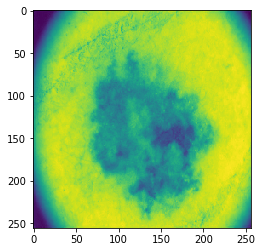

In [74]:
plt.imshow(imgs[0,:,:,0])

In [75]:
np.save('imgs.npy', imgs)
np.save('imgs_mask.npy', imgs_mask)

In [22]:
try:
    X = imgs
    Y = imgs_mask
except:
    X = np.load('imgs.npy')
    Y = np.load('imgs_mask.npy')

In [26]:
print (X.shape)
print (Y.shape)

(2000, 256, 256, 1)
(2000, 256, 256, 1)


In [33]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.20, random_state=42)

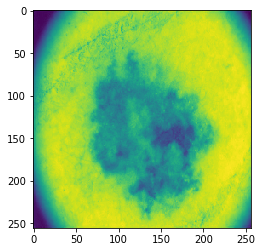

In [28]:
plt.imshow(X[0,:,:,0])

In [29]:
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -K.log(dice_coef(y_true, y_pred))

def custom_loss(y_true, y_pred):
    return (0.5*K.binary_crossentropy(y_true, y_pred) + 0.5 * dice_coef_loss(y_true, y_pred))

In [30]:
def get_unet():
    def add_common_layers(y):
        y = BatchNormalization()(y)
        y = LeakyReLU()(y)
        return y
    
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
#     conv1 = add_common_layers(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
#     conv2 = add_common_layers(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
#     conv3 = add_common_layers(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
#     conv4 = add_common_layers(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
#     conv5 = add_common_layers(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)
#     conv6 = add_common_layers(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)
#     conv7 = add_common_layers(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)
#     conv8 = add_common_layers(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)
#     conv9 = add_common_layers(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)
#     conv10 = add_common_layers(conv10)

    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(lr=1e-5), loss=custom_loss, metrics=[dice_coef, 'accuracy'])

    return model

In [34]:
unet = get_unet()
unet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_58 (Conv2D)              (None, 256, 256, 32) 320         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_59 (Conv2D)              (None, 256, 256, 32) 9248        conv2d_58[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_13 (MaxPooling2D) (None, 128, 128, 32) 0           conv2d_59[0][0]                  
__________________________________________________________________________________________________
conv2d_60 

In [35]:
segment_cnn = unet.fit(trainX, trainY, batch_size = 10, epochs = 15, verbose = True, validation_data = (testX, testY))

Train on 1600 samples, validate on 400 samples
Epoch 1/15
1600/1600 [==============================] - 149s 93ms/step - loss: 0.9928 - dice_coef: 0.2715 - acc: 0.8071 - val_loss: 0.9561 - val_dice_coef: 0.2778 - val_acc: 0.7982
Epoch 2/15
1600/1600 [==============================] - 144s 90ms/step - loss: 0.8056 - dice_coef: 0.3232 - acc: 0.8076 - val_loss: 0.6951 - val_dice_coef: 0.3867 - val_acc: 0.7982
Epoch 3/15
1600/1600 [==============================] - 148s 93ms/step - loss: 0.6158 - dice_coef: 0.4271 - acc: 0.8573 - val_loss: 0.6468 - val_dice_coef: 0.4459 - val_acc: 0.7201
Epoch 4/15
1600/1600 [==============================] - 150s 94ms/step - loss: 0.4002 - dice_coef: 0.6288 - acc: 0.8987 - val_loss: 0.3630 - val_dice_coef: 0.6651 - val_acc: 0.9049
Epoch 5/15
1600/1600 [==============================] - 151s 95ms/step - loss: 0.3230 - dice_coef: 0.7011 - acc: 0.9150 - val_loss: 0.3184 - val_dice_coef: 0.7082 - val_acc: 0.9118
Epoch 6/15
1600/1600 [==========================

In [36]:
predictions = unet.predict(testX)

In [37]:
y_example_pred = predictions[100]
y_example_true = testY[100]

thresh = threshold_otsu(y_example_pred[:,:,0])
y_example_pred = y_example_pred > thresh
y_example_pred = y_example_pred[:,:,0] > thresh

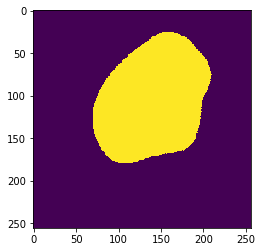

In [38]:
plt.imshow(y_example_pred)

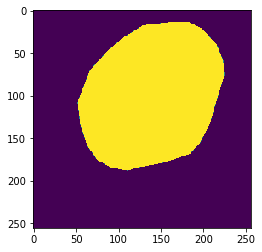

In [40]:
plt.imshow(y_example_true[:,:,0])